# <span style="color:royalblue"> [3주차] API 쉽게 배우기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# FRED(미국 연방 준비 은행 세인트루이스) 경제 데이터 활용_finance_datareader API변경

--- 

<div style="text-align: right"> Final Edition : 2022.11.2<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

# 1. API를 활용한 데이터 수집 및 분석

## 1.1 API란?
* 어플리케이션 프로그래밍 인터페이스(Application Programming Interface)
* 어플리케이션 소프트웨어를 구축하고 통합하기 위한 정의 및 프로토콜 세트
* 당사자 간의 규약. 한쪽 당사자가 특정방식으로 원격요청을 보내면 다른 당사자가 지정된 양식으로 응답하는 행위  

![API개념도](./data/API.png)

## 1.2  FRED 경제데이터 API
fredapi : Python API for FRED (Federal Reserve Economic Data)  
[fredapi 활용방법 깃허브 GitHub](https://github.com/mortada/fredapi)

## 1.3 API KEY 받는 방법 
[FRED Request or view your API keys](https://research.stlouisfed.org/docs/api/api_key.html)  
아래 블로그를 참고하여 멘티 분들은 직접 받아보시기 바랍니다. [참고블로그](https://junyoru.tistory.com/122)

(멘토) API 키 : 199409f370f5ace70b78d5b17ff02447

## 1.4 API 파이썬 패키지 설치

In [ ]:
# !pip install fredapi

## 1.5 fredapi 패키지와 fred 모듈 불러오기
여기까지 완료되면 모든 준비가 끝났습니다.

In [ ]:
from fredapi import Fred

# 할당받은 api key를 아래 따옴표 안에 넣으세요
fred = Fred(api_key='199409f370f5ace70b78d5b17ff02447')

### 1.5.1 데이터 불러오기
Ticker는 각 데이터명의 오른쪽에 있는 영문과 숫자조합 코드입니다.
https://fred.stlouisfed.org/series/WM2NS

## [참고] S&P500 지수
* 미국의 신용평가회사 스탠더드 앤드 푸어스(Standard & Poor's)에서 개발한 미국의 주가지수.
* S&P 500은 500개 대형기업의 주식을 포함한 지수(Standard & Poor's 500 Stock Index)
* 미국 3대 주가지수 : 다우존스(애플, 나이키 등 블루칩인 30개 종목), 나스닥(NASDAQCOM, 우리가 흔히 말하는 나스닥은 나스닥100), S&P500 

In [ ]:
data = fred.get_series('SP500') # SP500 : S&P500지수

In [ ]:
data.head()

2012-10-29        NaN
2012-10-30        NaN
2012-10-31    1412.16
2012-11-01    1427.59
2012-11-02    1414.20
dtype: float64

In [ ]:
data.tail()

2022-10-24    3797.34
2022-10-25    3859.11
2022-10-26    3830.60
2022-10-27    3807.30
2022-10-28    3901.06
dtype: float64

## 1.6 S&P500 지수 시각화
API를 이용해서 s&p500 지수를 가져오고 가져온 데이터를 시계열 그래프로 표현

<AxesSubplot:>

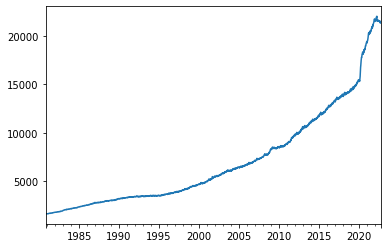

In [ ]:
data = fred.get_series('WM2NS') # SP500 : S&P500지수
data.plot()

<AxesSubplot:>

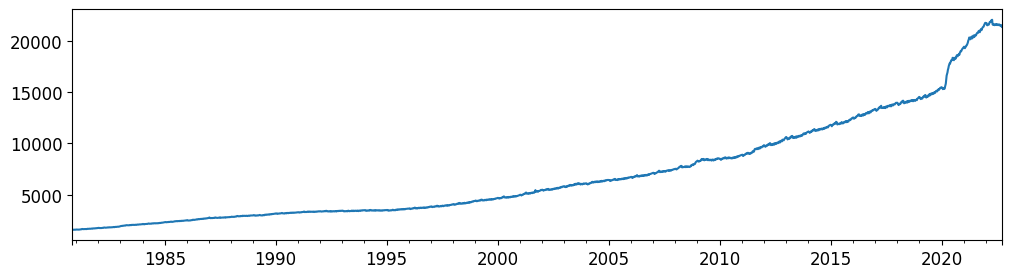

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

data.plot()

## 1.7 미국 기준금리
API를 이용해서 기준금리를 가져오고 가져온 데이터를 시계열 그래프로 표현

### Discount Rate 와 Federal Funds Rate 차이점  
Discount Rate 는 중앙은행(Central Bank)이 상업은행(commercial banks)에게 돈을 빌려줄 때 받는 이자율입니다.  
Federal Funds Rate 는 금융기관, 즉 은행들끼리 보유하고 있는 excess reserve를 다른 은행들에게 빌려줄때 받는 이자율입니다.

할인율(Discount Rate)은 시중은행(BOA etc.)이 연준(FED)으로부터 직접 차입할 때 부과하는 이자율입니다.   

당연히 연준으로 부터 돈을 빌리는 것은 최후의 수단이므로,   
**연준금리(중앙은행, Discount Rate)  > 연방기금(Federal Funds) 금리보다 높게** 유지함으로써,   
회원 은행들이 먼저 서로에게 돈을 빌리도록 권장합니다.

[교육] https://www.frbsf.org/education/publications/doctor-econ/2002/january/federal-funds-discount-rate-2001/

In [ ]:
# 기준금리 INTDSRUSM193N
# Interest_Rates = fred.get_series('INTDSRUSM193N')
Interest_Rates = fred.get_series('DFF')

In [ ]:
Interest_Rates.dropna(inplace=True)
#inplace arg는 기존의 데이터를 바꾸겠다는 뜻입니다.

In [ ]:
Interest_Rates

1954-07-01    1.13
1954-07-02    1.25
1954-07-03    1.25
1954-07-04    1.25
1954-07-05    0.88
              ... 
2022-10-23    3.08
2022-10-24    3.08
2022-10-25    3.08
2022-10-26    3.08
2022-10-27    3.08
Length: 24956, dtype: float64

<AxesSubplot:>

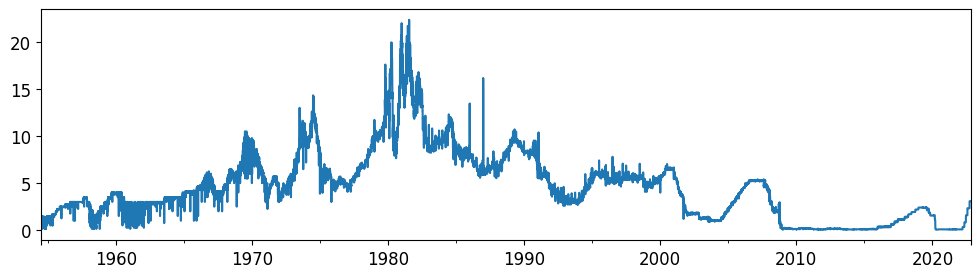

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

Interest_Rates.plot()

In [ ]:
Interest_Rates.tail()

2022-10-23    3.08
2022-10-24    3.08
2022-10-25    3.08
2022-10-26    3.08
2022-10-27    3.08
dtype: float64

## 1.8 미국금리와 S&P500 지수 시각화

금리와 주가를 한 그래프에 나타내는 경우, y축 값에 따라 한쪽 축값에 따라 매몰되게 됩니다. <br>
따라서 y축을 왼쪽과 오른쪽에 각각 나타내서 확인합니다.

<AxesSubplot:>

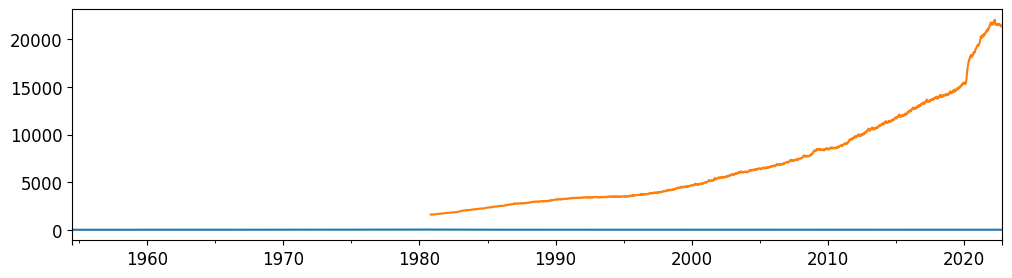

In [ ]:
Interest_Rates.plot()
data.plot()

In [ ]:
# pandas_datareader 모듈 사용방법(참고사항)

# import pandas_datareader as web
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns
# from datetime import datetime 

# start = datetime(2010,1,1)
# end = datetime(2030,1,1)

# SP500 = web.DataReader('SP500','fred',start,end)
# SP500

,SP500
DATE,
2012-10-31,1412.16
2012-11-01,1427.59
2012-11-02,1414.20
2012-11-05,1417.26
2012-11-06,1428.39
...,...
2022-10-24,3797.34
2022-10-25,3859.11
2022-10-26,3830.60


# 2. finance-datareader

## 2.1  finance-datareader 패키지 설치

In [1]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
## pip install 방화벽이 있는 경우, 아래와 같이 추가
# !pip install finance-datareader --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org

## 방화벽이 있는 IP의 경우 SSL 신뢰코드

## 파이썬에서 CERTIFICATE_VERIFY_FAILED 에러가 발생할때 해결코드입니다.
## [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1125)')))

import ssl
context = ssl._create_unverified_context()

# import requests
# response = requests.get(url,verify=False)

### [참고] 플롯 설정입니다.
plt.rcParams["axes.grid"] = True # 회색 그리드(바둑판) 설정
plt.rcParams['axes.unicode_minus'] = False # 한글 마이너스 폰트 깨질 경우 

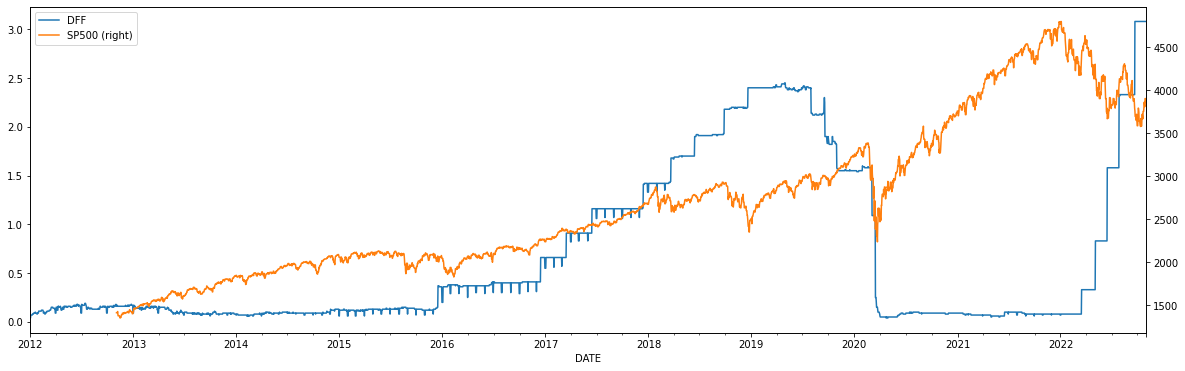

In [5]:
# 기준금리와 주가를 한 그래프에서 확인

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

IR_SP = fdr.DataReader('FRED:DFF, SP500', '2012-01-01') #DFF #INTDSRUSM193N
graph = IR_SP.plot(secondary_y = 'SP500')

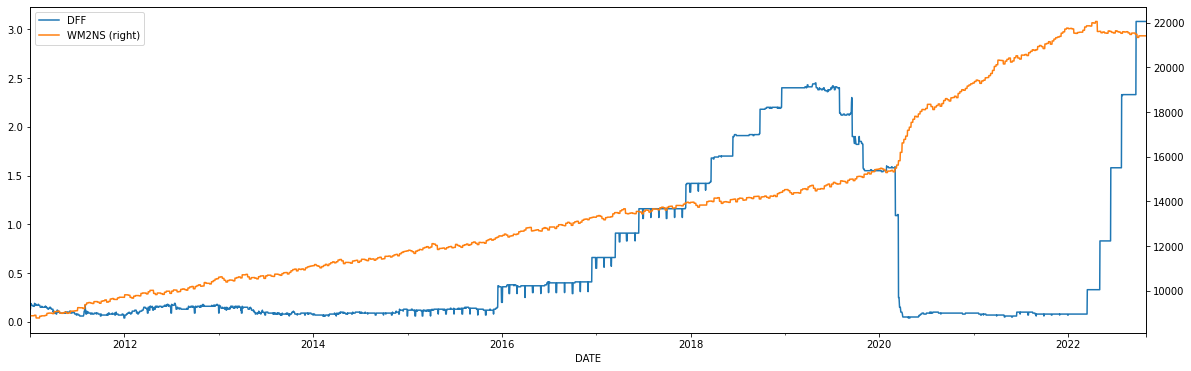

In [17]:
# 기준금리와 통화량을 한 그래프에서 확인

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

IR_M2 = fdr.DataReader('FRED:DFF, WM2NS', '2011') #WM2NS #M2

graph = IR_M2.plot(secondary_y = 'WM2NS')

### 산업생산지수(IPMAN)  

산업생산지수란 한 나라의 공장에서 각종 물건이 과거에 비해 얼마나 많이 생산되고 있는지 조사를 한 것  

* 산업생산지수가 증가 : 공장에서 각종 물건이 과거에 비해 더 많이 생산되고 있다.
* 산업생산지수가 감소 : 공장이 과거에 비해 잘 돌아가지 않고 있다.

* 산업생산지수 종류 : 광공업 생산지수, 제조업 생산지수, 서비스업 생산지수

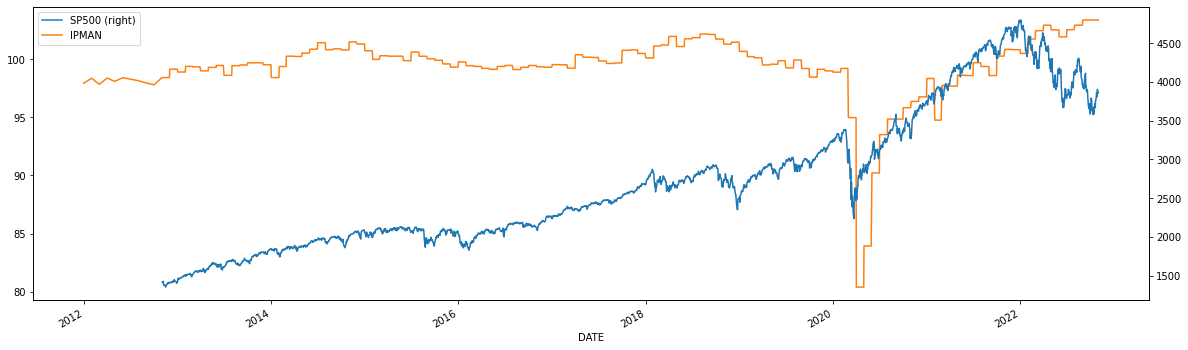

In [18]:
# 산업생산지수와 주가를 한 그래프에서 확인
# IPI(산업생산지수)는 미국 연방준비제도이사회에서 발표한 제조업, 광업, 유틸리티의 실질 생산량을 측정하는 경제 지표

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

IR_SP = fdr.DataReader('FRED:IPMAN, SP500', '2012')
graph = IR_SP.plot(secondary_y = 'SP500')

### PMI 지수(Purchasing Management Index)
제조업 구매 관리 지수  
PMI는 신규수주 30%, 생산 25%, 고용 20%, 공급자 운송시간 15%, 재고 10% 5개 지표의 가중치를 통해 산출하는 종합지수

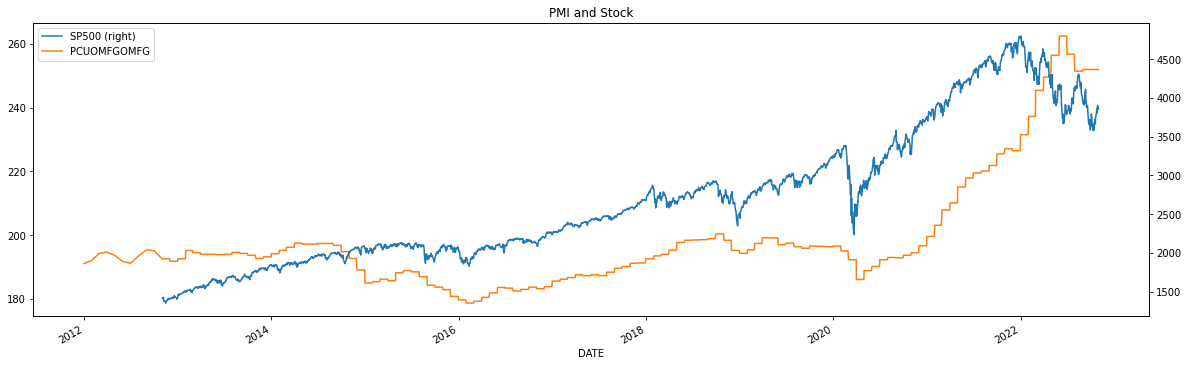

In [19]:
# 제조업 구매관리 지수와 주가를 한 그래프에서 확인

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

PMI = fdr.DataReader('FRED:PCUOMFGOMFG, SP500', '2012')
gg = PMI.plot(secondary_y = 'SP500', title = "PMI and Stock")

## 2.2 미국 장단기 금리차이

[경제상식] **돈은 수익률이 높은 곳으로 흐릅니다.<br>**
  
미국 금리와 경제상황에 대한 지표로 10년물 미국채권 금리와 2년물의 차이를 가장 많이 봅니다.<br>
일반적으로 10년 짜리 채권금리(장기국채) > 2년 짜리 채권금리(단기국채)<br>
(돈을 장기로 빌려주는 것이 리스크가 더 크므로 이자를 많이 받습니다)

* 장단기 금리 차이 = 10년물 국채금리 -  2년물 국채금리<br>

만약 반대적으로 <br>
**10년물 금리(수익률) < 2년물** 이 되는 것을 장단기 금리 역전현상이라고 합니다.<br>

![R의공포](./data/R.jpg)

경기의 불황을 예상 → 시장참여자들이 금리가 내릴것으로 기대 → 이자가 떨어진다고 하면 장기채권(예. 이미 확보된 5% 마진)을 사놓는 것이 유리. → 장기채권에 돈이 몰림 → 장기채권 가격상승 → 장기채권 발행자는 금리를 낮춤.

R의 공포(Recession) 경기침체의 신호로 봅니다.
(참고자료)[경제 유튜버 홍춘옥님](https://www.youtube.com/watch?v=5sbZRGHnaRA)

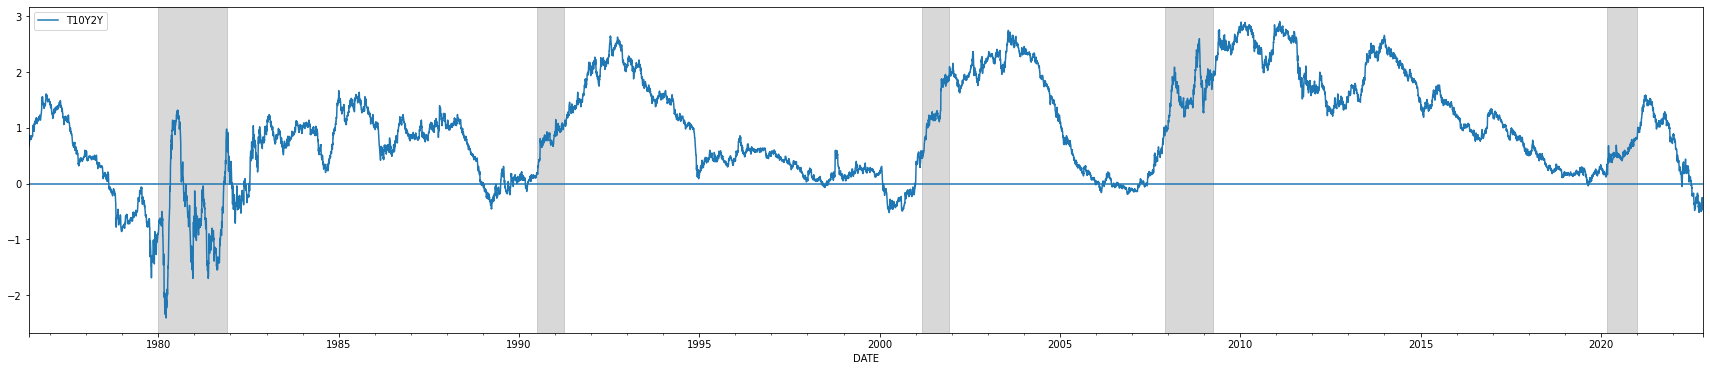

In [23]:
import FinanceDataReader as fdr
import matplotlib as plt

# import ssl
# context = ssl._create_unverified_context()

plt.rcParams["figure.figsize"] = (30,6)

Interest_rate_diff =fdr.DataReader('FRED:T10Y2Y', '1970-01-01')
graph = Interest_rate_diff.plot()

# 두 그래프의 차이가 0보다 작은 구간이 발생한 이후, 실제 경기침체(회색음영)이 발생했음을 알 수 있습니다.
graph.axhline(y=0) #xmin=0.1, xmax=0.9)

graph.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)
graph.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
graph.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
graph.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
graph.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

In [ ]:
Interest_rate_diff.tail()

,T10Y2Y
DATE,
2022-10-24,-0.25
2022-10-25,-0.32
2022-10-26,-0.35
2022-10-27,-0.34
2022-10-28,-0.39


## 2.3 M2 통화량

* M0 통화량(본원통화) : 한국은행에서 시중은행으로 들어가는 실제 돈(이 돈이 대출을 통해 통화가 팽창)
* M1 통화량(협의통화) : 우리가 당장 은행에 가서 현금으로 찾을 수 있는 유동성이 높은 통화의 양 ( = 요구불 예금 + 수시 입출금식 예금 )
* M2 통화량(광의통화) : 시중 유동성을 참고하는 지표, 경제관련 기사에서 등장하는 통화량으로 경제성장률, 물가, 금리를 감안하여 조절                        M1통화량에 추가로 2년 미만 정기예적금 + 시장형 금융상품(펀트) + 금융채권 + 양도성예금증서(CD) 를 포함

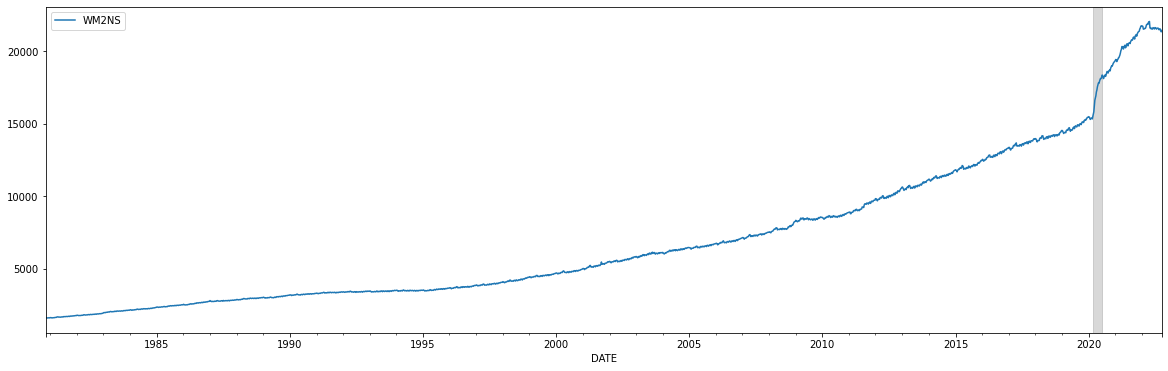

In [24]:
# M2 통화량과, 나스닥, 주택가격지수
import FinanceDataReader as fdr
import matplotlib as plt

import ssl
context = ssl._create_unverified_context()

plt.rcParams["figure.figsize"] = (20,6)
M2 =fdr.DataReader('FRED:WM2NS') ##WM2NS #M2
# NAS_M2 =fdr.DataReader('NASDAQCOM', 'M2', data_source='fred')

graph = M2.plot()

graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

## 2.4 NASDAQ 지수

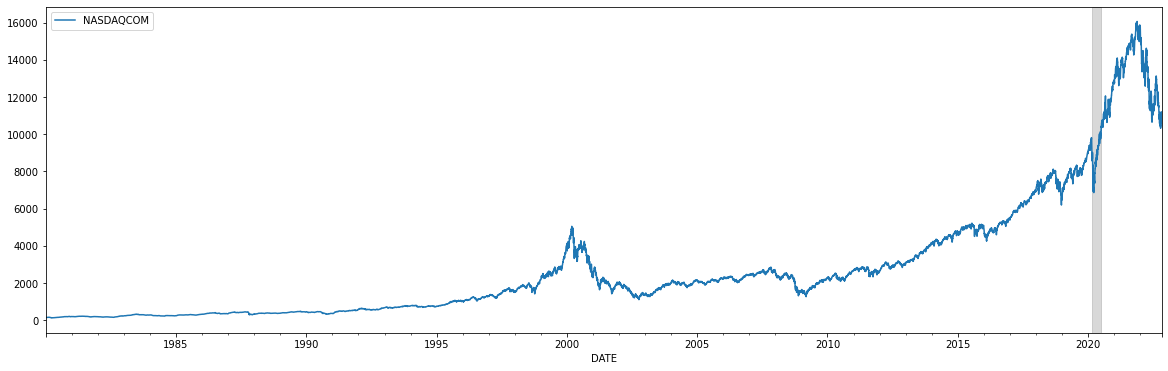

In [25]:
plt.rcParams["figure.figsize"] = (20,6)

NAS =fdr.DataReader('FRED:NASDAQCOM')
NAS

graph = NAS.plot()
graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

## 2.5 M2 통화량과 나스닥

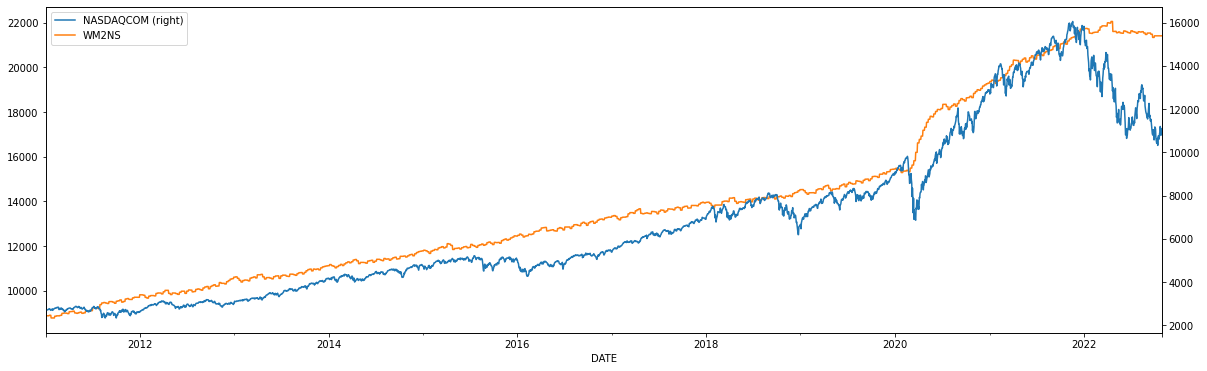

In [27]:
plt.rcParams["figure.figsize"] = (20,6)
M2 = fdr.DataReader('FRED:NASDAQCOM, WM2NS', '2011')
graph = M2.plot(secondary_y = 'NASDAQCOM')

### 2.5.1 M2 통화량과 나스탁의 상관관계

In [28]:
import numpy as np

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

M2.corr(method=histogram_intersection)

,NASDAQCOM,WM2NS
NASDAQCOM,1.0,20877769.2
WM2NS,20877769.2,1.0


In [29]:
M2.corrwith

<bound method DataFrame.corrwith of             NASDAQCOM    WM2NS
DATE                          
2011-01-03    2691.52   8888.5
2011-01-04    2681.25   8888.5
2011-01-05    2702.20   8888.5
2011-01-06    2709.89   8888.5
2011-01-07    2703.17   8888.5
...               ...      ...
2022-10-25   11199.12  21409.7
2022-10-26   10970.99  21409.7
2022-10-27   10792.67  21409.7
2022-10-28   11102.45  21409.7
2022-10-31   10988.15  21409.7

[3086 rows x 2 columns]>

In [30]:
M2.corr(method='pearson', min_periods=1)

,NASDAQCOM,WM2NS
NASDAQCOM,1.000000,0.974745
WM2NS,0.974745,1.000000


# [참고] 화폐수량이론

'가격이 화폐량에 의해 결정이 된다'는 이론에 따른 수량 방정식(Quantity theory of money, QTM) <br>
<br>

<span style="color:blue; font-weight:bold; font-size:20pt">

\begin{equation}
    {\displaystyle M\cdot {\bar {V}}= P \cdot {\bar {Y}}}
\end{equation}

</span>  
<br>
(1) M은 통화량, V는 화폐유통속도, P는 가격 수준, Y는 생산량이다.

# 3. 주택가격지수와 각 경제지표와의 상관관계

## 3.1 케이스-쉴러 지수와 M2 통화량

,CSUSHPISA,WM2NS
CSUSHPISA,1.000000,0.971976
WM2NS,0.971976,1.000000


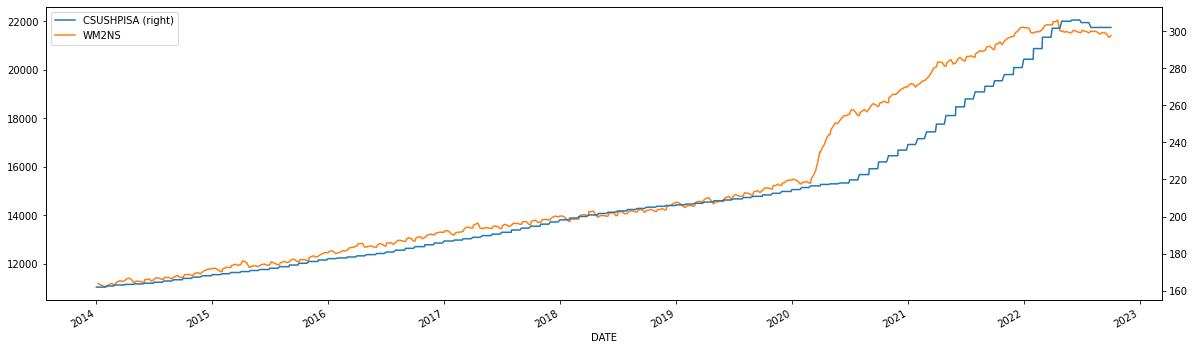

In [31]:
plt.rcParams["figure.figsize"] = (20,6)

CS_M2 = fdr.DataReader('FRED:CSUSHPISA, WM2NS', '2014')
graph = CS_M2.plot(secondary_y = 'CSUSHPISA')
CS_M2.corr(method='pearson', min_periods=1)

## 3.2 케이스-쉴러 지수 + US House Price Index + M2 통화량 

In [32]:
# M2 통화량과, 나스닥, 주택가격지수

US_CS_M2 = fdr.DataReader('FRED:CSUSHPISA, WM2NS, USSTHPI', '2014')
print(US_CS_M2)

US_CS_M2.corr(method='pearson', min_periods=1)

            CSUSHPISA  USSTHPI    WM2NS
DATE                                   
2014-01-01    161.944   331.70      NaN
2014-01-06    161.944   331.70  11179.0
2014-01-13    161.944   331.70  11131.1
2014-01-20    161.944   331.70  11100.9
2014-01-27    161.944   331.70  11033.2
...               ...      ...      ...
2022-09-05    301.929   617.89  21532.0
2022-09-12    301.929   617.89  21534.8
2022-09-19    301.929   617.89  21481.8
2022-09-26    301.929   617.89  21338.0
2022-10-03    301.929   617.89  21409.7

[546 rows x 3 columns]


,CSUSHPISA,USSTHPI,WM2NS
CSUSHPISA,1.000000,0.997213,0.971976
USSTHPI,0.997213,1.000000,0.966626
WM2NS,0.971976,0.966626,1.000000


## 3.3 케이스-쉴러 지수(CSUSHPISA)와 주간 실업수당 청구 건수(ICSA)

요즘 미국 경기를 이야기 할 때 뉴스에 가장 많이 등장하는 지표중의 하나가 바로 주단위 신규 실업수당청구 건수 입니다.<br>
경기가 나빠지는 경우는 후행지표로 동작하지만, 경기가 좋아지는 경우 선행 지표로 활용할 수 있습니다.<br>
2008년 금융위기 때는 약간 후행하는 모습을 보이고 있습니다.

[참고] 연속 실업수당청구 건수 Continued Claims (Insured Unemployment)<br>
[CCSA](https://fred.stlouisfed.org/series/CCSA)

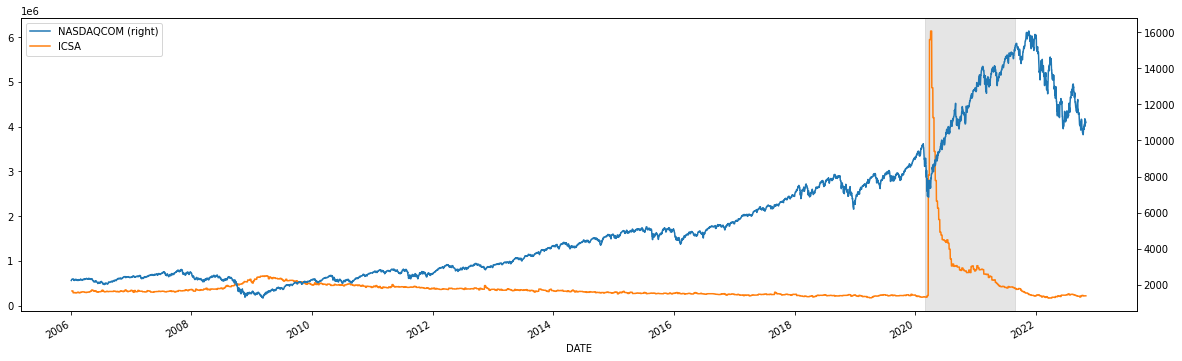

In [34]:
df = fdr.DataReader('FRED:NASDAQCOM, ICSA', '2006')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2020-03-01', '2021-08-30', color='gray', alpha=0.2)

## 3.4 미국 주택판매지수

주택 판매 지수는 주택시장 활성화 정도를 나타냅니다. 불황으로 주가가 하락할 때 하락에 앞서 주택 판매 지수가 하락하는 모습을 보입니다.

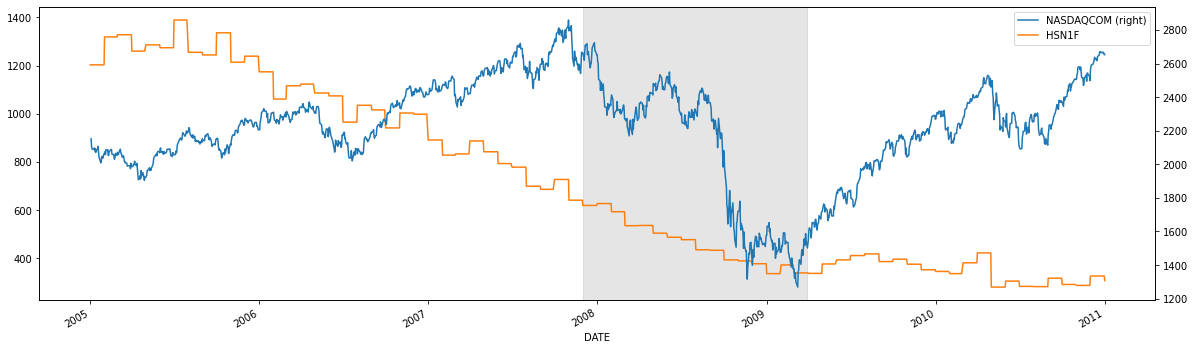

In [36]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주택 판매 지수

df = fdr.DataReader('FRED:NASDAQCOM, HSN1F', '2005', '2011')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

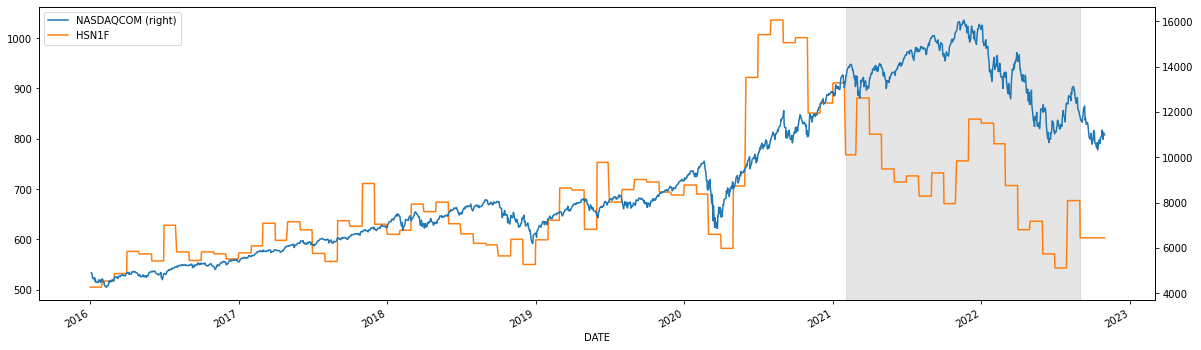

In [37]:
# 2022년 11월 현재 주택판매지수와 나스닥 지수와의 관계 

df = fdr.DataReader('FRED:NASDAQCOM, HSN1F', '2016')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2021-02-01', '2022-09-01', color='gray', alpha=0.2)

# 실제 부동산 매물이 팔리는 데 걸리는 기간(뉴스기사 인용)

<center><img src="./data/USA.jpg" width="300" height="100"></center>

# 4. Macro 지표와 주택가격지수

지금까지 공부한 S&P500 지수, 케이스&쉴러지수, 미국기준금리, 미국주택가격지수, M2 통화량에 대한 상관관계를 한번에 계산

In [38]:
df_allinone = fdr.DataReader('FRED:CSUSHPISA, WM2NS, USSTHPI,INTDSRUSM193N, SP500, ICSA, HSN1F', '2014')
df_allinone.corr(method='pearson', min_periods=1)

,SP500,CSUSHPISA,INTDSRUSM193N,HSN1F,USSTHPI,WM2NS,ICSA
SP500,1.000000,0.942538,-0.283888,0.684408,0.935258,0.964775,0.071191
CSUSHPISA,0.942538,1.000000,-0.317767,0.555224,0.997255,0.971787,0.068242
INTDSRUSM193N,-0.283888,-0.317767,1.000000,-0.112620,-0.288710,-0.413346,-0.288026
HSN1F,0.684408,0.555224,-0.112620,1.000000,0.562267,0.680195,0.230848
USSTHPI,0.935258,0.997255,-0.288710,0.562267,1.000000,0.966155,0.079631
WM2NS,0.964775,0.971787,-0.413346,0.680195,0.966155,1.000000,0.180209
ICSA,0.071191,0.068242,-0.288026,0.230848,0.079631,0.180209,1.000000


In [39]:
df_allinone

,SP500,CSUSHPISA,INTDSRUSM193N,HSN1F,USSTHPI,WM2NS,ICSA
DATE,,,,,,,
2014-01-01,NaN,161.944,0.75,443.0,331.70,NaN,NaN
2014-01-02,1831.98,161.944,0.75,443.0,331.70,NaN,NaN
2014-01-03,1831.37,161.944,0.75,443.0,331.70,NaN,NaN
2014-01-04,1831.37,161.944,0.75,443.0,331.70,NaN,322000.0
2014-01-06,1826.77,161.944,0.75,443.0,331.70,11179.0,322000.0
...,...,...,...,...,...,...,...
2022-10-26,3830.60,301.929,0.25,603.0,617.89,21409.7,217000.0
2022-10-27,3807.30,301.929,0.25,603.0,617.89,21409.7,217000.0
2022-10-28,3901.06,301.929,0.25,603.0,617.89,21409.7,217000.0


# 경제전문 신문기사 
* [한국경제TV 글로벌_뜨거운 미국 남가주 주택시장, 주택 매매가 최고가 갱신! 전망은?](https://m.kvina.co.kr/newsCenter/view.asp?articleId=A202107290198&pgCode=0303)

# 데이터 분석에 참고할 만한 괜찮은 블로그
파이썬 코드 공부에 괜찮은 블로그 입니다.

1. 그래프 그리기
https://codetorial.net/matplotlib/two_types_of_graphs.html

2. BBC 뉴스기사 분석
https://codetorial.net/beautifulsoup/crawling_ex03.html

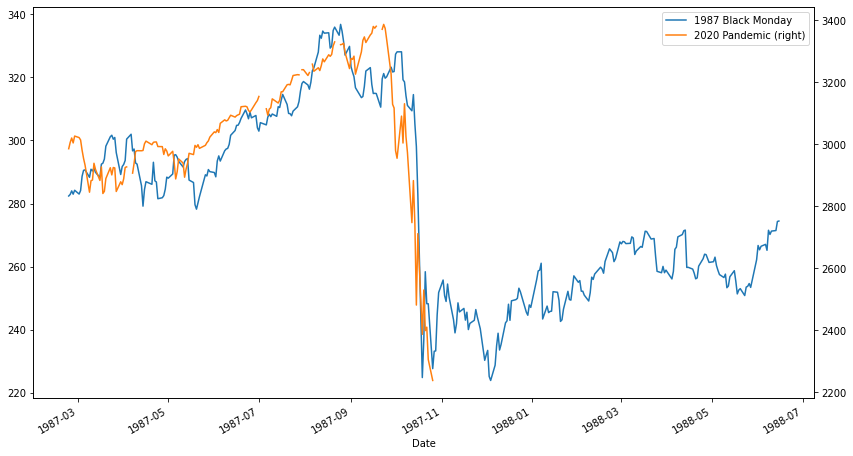

In [40]:
# S&P 500 지수의 현재와 1987년 블랙먼데이

# 2020 FinanceData.KR
import pandas as pd
from datetime import datetime, timedelta

# Yahoo 1928~현재 S&P500 지수 데이터
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1585008000&interval=1d&events=history'
sp500 = pd.read_csv(url, parse_dates=True, index_col='Date')

days240 = timedelta(days=240) # 1년

# Black monday 1987-10-19
black_mondy = datetime(1987,10,19)
ts1 = sp500[black_mondy - days240:black_mondy + days240]['Adj Close']

# Pandemic 2020-03-13
start = datetime(2020, 3, 13)
ts2 = sp500[start - days240:start + days240]['Adj Close']
ts2.index = ts2.index.shift(-11837, freq='D')

df_plot = pd.DataFrame()
df_plot['1987 Black Monday'] = ts1
df_plot['2020 Pandemic'] = ts2
_ = df_plot.plot(secondary_y='2020 Pandemic', figsize=(14,8))

## [특별] Stagflation 스태그플레이션과 부동산

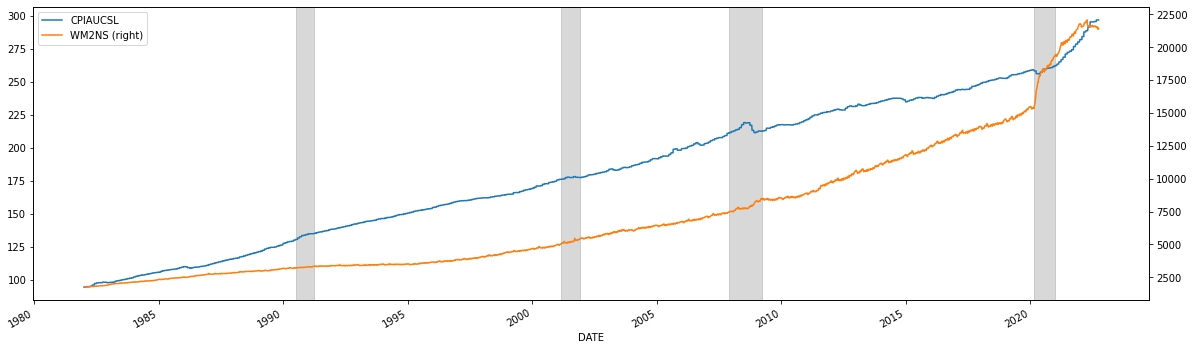

In [46]:
# 2022년 11월 현재 소비자 물가지수와 M2통화량의 관계 

# 소비자 물가지수 Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
# M2 통화량 Real M2 Money Stock (M2REAL)

df = fdr.DataReader('FRED:CPIAUCSL, WM2NS', '1982')
ax = df.plot(secondary_y='WM2NS')

# 경제위기 Finacial crisis
# ax.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)
ax.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
ax.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
ax.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
ax.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

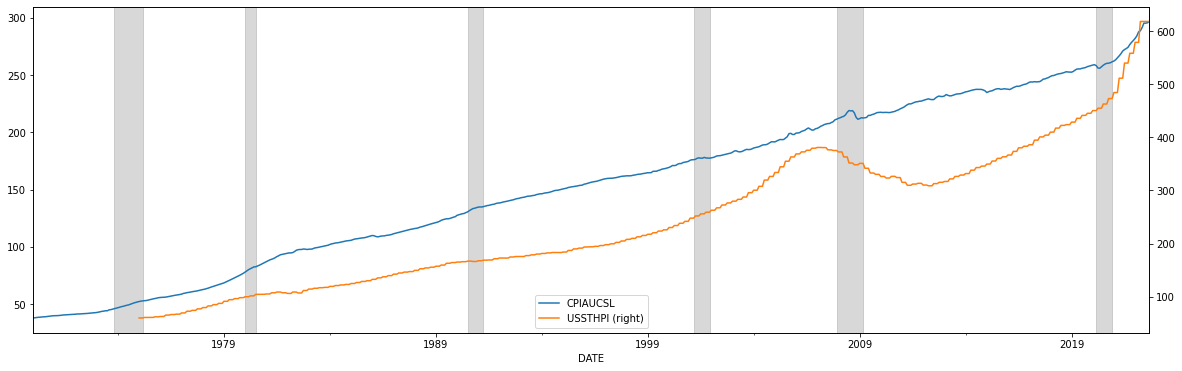

In [47]:
# 2022년 11월 현재 소비자 물가지수와 미국주택가격지수와의 관계 

df = fdr.DataReader('FRED:CPIAUCSL, USSTHPI', '1970')
ax = df.plot(secondary_y='USSTHPI')

ax.axvspan('1973-11-01', '1975-03-01',color='gray', alpha=0.3)
ax.axvspan('1980-01-01', '1980-07-01',color='gray', alpha=0.3)
ax.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
ax.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
ax.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
ax.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

전미경제조사국(NBER)에서 정의한 미국 경제 침체국면 중에서 소비자물가가 10% 이상 상승한 기간은   
73년 11월~ 75년 3월’과 ‘80년 1월~80년 7월’ 두 경우다.

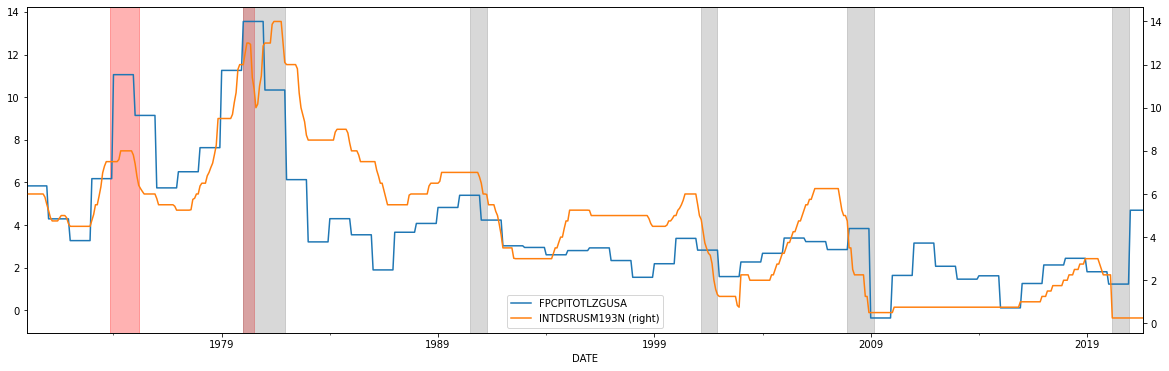

In [48]:
# 2022년 11월 현재 소비자 물가지수와 기준금리와의 관계 

# 인플레이션 Inflation, consumer prices for the United States (FPCPITOTLZGUSA) 
# 금리 INTDSRUSM193N'

df = fdr.DataReader('FRED:FPCPITOTLZGUSA, INTDSRUSM193N', '1970')
ax = df.plot(secondary_y='INTDSRUSM193N')

ax.axvspan('1973-11-01', '1975-03-01',color='red', alpha=0.3)
ax.axvspan('1980-01-01', '1980-07-01',color='red', alpha=0.3)

ax.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)
ax.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
ax.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
ax.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
ax.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

In [ ]:
# 우리가 흔히 이야기 하는 CPI 미국 소비자 물가지수 <전년동월대비>
#  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)

# 2022년 9월 13일 발표 : 8.3%
# 2022년 10월 13일 발표 : 8.2%
# 2022년 11월 10일 발표 : 8.1%(예측)

# https://kr.investing.com/economic-calendar/cpi-733

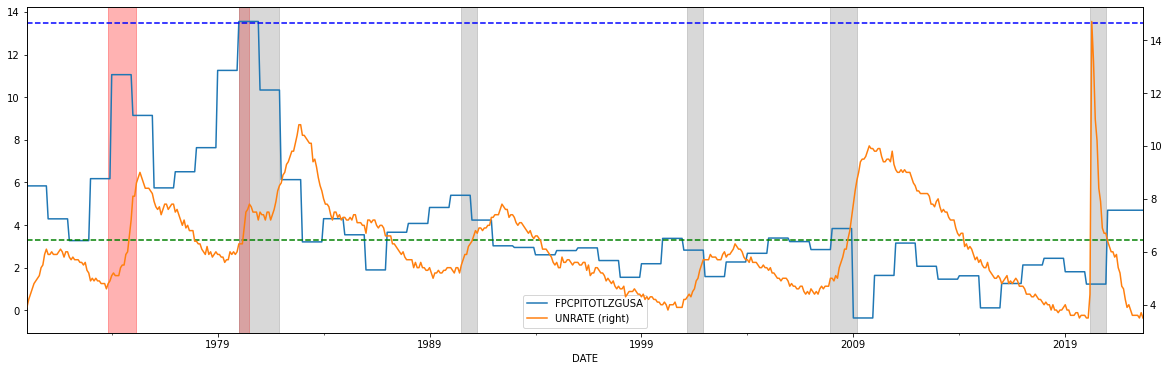

In [49]:
# 2022년 11월 현재 인플래이션과 실업률의 관계 

# Inflation, consumer prices for the United States (FPCPITOTLZGUSA) 
# 실업률 Unemployment Rate (UNRATE)

df = fdr.DataReader('FRED:FPCPITOTLZGUSA, UNRATE', '1970')
ax = df.plot(secondary_y='UNRATE')

ax.axhline(3.3, ls='--', color = 'g') #3.3%
ax.axhline(13.5, ls='--', color = 'b') #13.5% [연간 7년간 10%이상 상승률]

ax.axvspan('1973-11-01', '1975-03-01',color='red', alpha=0.3)
ax.axvspan('1980-01-01', '1980-07-01',color='red', alpha=0.3)

ax.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)
ax.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
ax.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
ax.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
ax.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

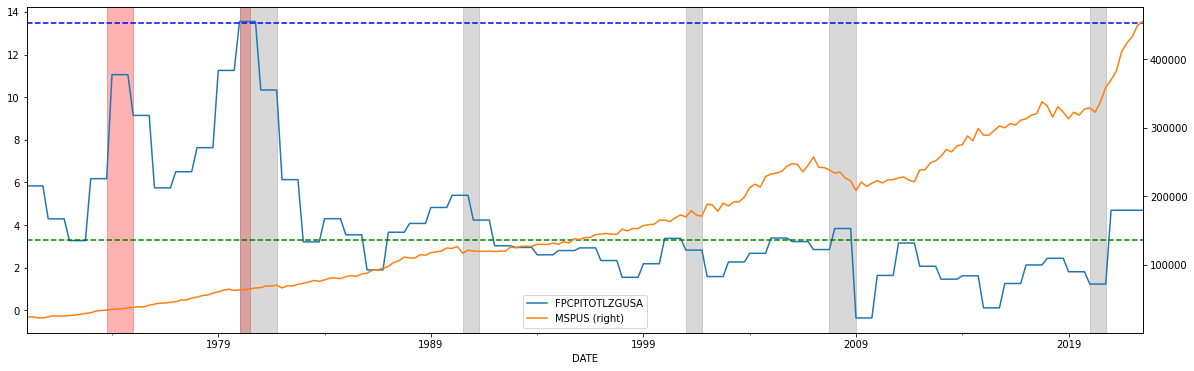

In [51]:
# 2022년 11월 현재 인플래이션과 주택판매지수의 관계 

# 인플래이션 Inflation, consumer prices for the United States (FPCPITOTLZGUSA) 
# 중위 주택 가격 Median Sales Price of Houses Sold for the United States (MSPUS)

df = fdr.DataReader('FRED:FPCPITOTLZGUSA, MSPUS', '1970')
ax = df.plot(secondary_y='MSPUS')

ax.axhline(3.3, ls='--', color = 'g') #3.3%
ax.axhline(13.5, ls='--', color = 'b') #13.5% [연간 7년간 10%이상 상승률]

ax.axvspan('1973-11-01', '1975-03-01',color='red', alpha=0.3)
ax.axvspan('1980-01-01', '1980-07-01',color='red', alpha=0.3)

ax.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)
ax.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
ax.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
ax.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
ax.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

In [ ]:
df

,FPCPITOTLZGUSA,MSPUS
DATE,,
1970-01-01,5.838255,23900.0
1970-04-01,5.838255,24400.0
1970-07-01,5.838255,23000.0
1970-10-01,5.838255,22600.0
1971-01-01,4.292767,24300.0
...,...,...
2021-07-01,4.697859,411200.0
2021-10-01,4.697859,423600.0
2022-01-01,4.697859,433100.0


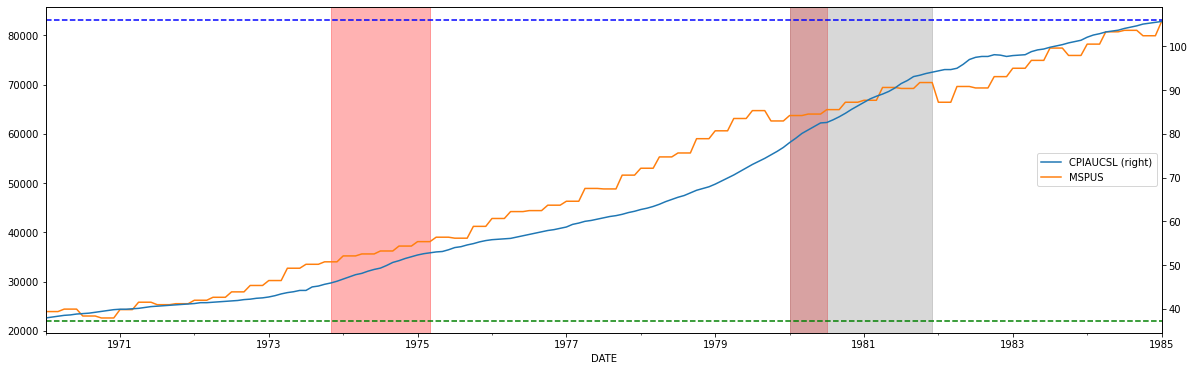

In [52]:
# 미국 중위 주택가격 Median Sales Price of Houses Sold for the United States (MSPUS)
# 미국 소비자 물가지수 Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)

df = fdr.DataReader('FRED:MSPUS,CPIAUCSL', '1970', '1985')
ax = df.plot(secondary_y='CPIAUCSL')

ax.axhline(22000, ls='--', color = 'g') #1970년초 중위 주택 가격 2만불
ax.axhline(83000, ls='--', color = 'b') #1985년 중위 주택 가격 8만불 (4배 가까운 상승). 실업률 상승과 경기 침체 속 주택가격 급등

# 물가상승
ax.axvspan('1973-11-01', '1975-03-01',color='red', alpha=0.3)
ax.axvspan('1980-01-01', '1980-07-01',color='red', alpha=0.3)

# 경기침체
ax.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)

In [54]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [55]:
import yfinance as yf

start_date = '2010-01-01'
end_date = '2021-01-01'
data = yf.download(['USDKRW=X','JPYKRW=X'],start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


In [56]:
data

Adj Close                   Close                    High  \
             JPYKRW=X     USDKRW=X   JPYKRW=X     USDKRW=X   JPYKRW=X   
Date                                                                    
2010-01-01  12.329000  1146.000000  12.329000  1146.000000  12.382000   
2010-01-04  12.242000  1132.400024  12.242000  1132.400024  12.506000   
2010-01-05  12.461000  1141.300049  12.461000  1141.300049  12.465000   
2010-01-06  12.236000  1130.400024  12.236000  1130.400024  12.484000   
2010-01-07  12.146000  1134.900024  12.146000  1134.900024  12.294000   
...               ...          ...        ...          ...        ...   
2020-12-25  10.611770  1099.910034  10.611770  1099.910034  10.639432   
2020-12-28  10.578205  1099.089966  10.578205  1099.089966  10.621293   
2020-12-29  10.551339  1095.000000  10.551339  1095.000000  10.567798   
2020-12-30  10.549580  1092.619995  10.549580  1092.619995  10.561517   
2020-12-31  10.548277  1086.420044  10.548277  1086.420044  10.597466   

                               Low                    Open               \
               USDKRW=X   JPYKRW=X     USDKRW=X   JPYKRW=X     USDKRW=X   
Date                                                                      
2010-01-01  1151.099976  12.300000  1145.099976  12.382000  1151.099976   
2010-01-04  1156.300049  12.240000  1132.400024  12.420000  1152.099976   
2010-01-05  1142.300049  12.241000  1128.900024  12.243000  1132.300049   
2010-01-06  1143.500000  12.196000  1123.699951  12.461000  1141.099976   
2010-01-07  1136.400024  12.102000  1127.000000  12.240000  1130.300049   
...                 ...        ...          ...        ...          ...   
2020-12-25  1101.660034  10.601003  1098.900024  10.611770  1098.900024   
2020-12-28  1106.000000  10.553534  1093.300049  10.576774  1099.089966   
2020-12-29  1096.420044  10.505610  1089.969971  10.560297  1096.420044   
2020-12-30  1092.469971  10.490055  1083.650024  10.551516  1091.250000   
2020-12-31  1088.800049  10.491264  1082.089966  10.534522  1086.420044   

             Volume           
           JPYKRW=X USDKRW=X  
Date                          
2010-01-01      0.0      0.0  
2010-01-04      0.0      0.0  
2010-01-05      0.0      0.0  
2010-01-06      0.0      0.0  
2010-01-07      0.0      0.0  
...             ...      ...  
2020-12-25      0.0      0.0  
2020-12-28      0.0      0.0  
2020-12-29      0.0      0.0  
2020-12-30      0.0      0.0  
2020-12-31      0.0      0.0  

[2866 rows x 12 columns]

#### 비탄력적 소비자물가지수(sticky-price CPI, CORESTICKM159SFRBATL) : 가격변동이 크지 않은 상품과 서비스
↔ 탄력적 소비자물가지수(flexible-price CPI) : 자동차 연료, 자동차 및 트럭 렌탈비, 채소·과일 가격, 중고차 가격, 성인 의류

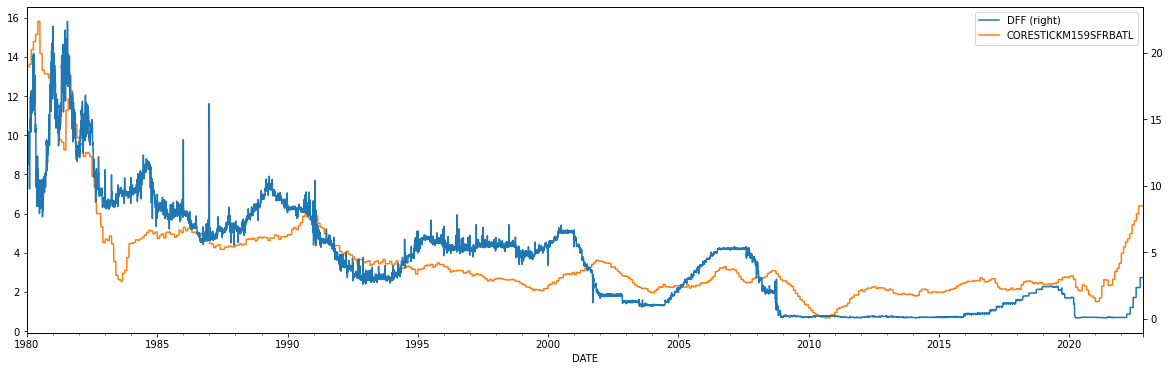

In [57]:
import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

IR_SP = fdr.DataReader('FRED:CORESTICKM159SFRBATL, DFF')
graph = IR_SP.plot(secondary_y = 'DFF')